## Introduction

We will be using the London airbnb listings database to perform a hypothesis test to answer the following question.
- **Is there a statistical significance between number of reviews and price?if so at which levels**
- **Is there a statistical significance between length of titles and number of reviews? if so at which levels**
- **Are there any significant price differences between room types?**
- **Are there significant price differences between London neighbourhoods?**

Content of Dataset
"London airbnb listing data files includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions."

### Setting the Context


**Audience**: AirBnB property management company looking to expand to London market. HostMaker, AirSorted

**Consultancy**: Hired by company above to look for insights to what type of property should they focus on to increase margin / look for regions and room type where better chance of landing higher

Also lay down caveats, costs are fixed, higher number of nights, better

Given your costs are fixed (ie cleaners) we are here to find for you which part of London which may get you higher margins. ie make graph of margin by borough

Once you've picked your, best length to actually set the title and does review actually play a part in this?

Convince travellers that pay slightly more to achieve whole house vs hotel room only



## Loading libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from external_modules.shuyu_finn import *
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import geopandas as gpd
import itertools # for combinations


In [3]:
airbnb_df =[]
for m in ['jan','feb','mar','apr','may','jun','jul','aug','sep','nov']:
    airbnb_df.append(pd.read_csv('data/listings_{}.csv'.format(m), parse_dates=['last_review']))

## Retrieve data into pandas dataframe

In [4]:
airbnb_df_2019 = pd.concat(airbnb_df)

In [5]:
airbnb_df_2019

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Guy,NaN,Haringey,51.587767,-0.105666,Private room,35,1,134,2019-01-01,1.64,4,0
1,25123,Clean big Room in London (Room 1),103583,Grace,NaN,Barnet,51.572243,-0.209060,Private room,29,15,118,2018-11-01,1.11,4,0
2,28010,LOVELY Dbl Bedroom in Shoreditch!,119316,Valentina,NaN,Tower Hamlets,51.524969,-0.073727,Private room,50,3,38,2018-01-02,0.48,3,81
3,33332,Twickenham Stadium & Wimbledon easy reach Ensuite,144444,Chi-Chi,NaN,Hounslow,51.465074,-0.324207,Private room,100,1,4,2018-11-04,0.04,2,365
4,36299,Kew Gardens 3BR house in cul-de-sac,155938,Geert,NaN,Richmond upon Thames,51.479345,-0.280662,Entire home/apt,195,3,63,2018-12-30,0.63,1,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,38398365,Beautiful flat in Central London,24782379,Shabnam,NaN,Lambeth,51.486010,-0.127660,Entire home/apt,117,3,2,2019-11-04,2.00,1,59
85064,39869123,Elegant stylish modern house with amazing view!,21145791,Ingrid,NaN,Merton,51.406280,-0.232440,Private room,69,2,0,NaT,NaN,2,113
85065,39869214,Holland Road - Kensington Olympia,251922260,Christian,NaN,Hammersmith and Fulham,51.502440,-0.215470,Entire home/apt,90,3,0,NaT,NaN,4,63
85066,39869249,Functional single room 18 min to London Bridge,255372486,Nudrat,NaN,Bromley,51.357420,0.107640,Private room,30,2,0,NaT,NaN,4,1


## Data cleaning and feature engineering

### Check dtypes

In [6]:
airbnb_df_2019.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

### Drop missing value columns

In [7]:
airbnb_df_2019.isnull().sum()

id                                     0
name                                 266
host_id                                0
host_name                            472
neighbourhood_group               817579
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                       203879
reviews_per_month                 203879
calculated_host_listings_count         0
availability_365                       0
dtype: int64

In [8]:
airbnb_df_2019.drop(['host_name','neighbourhood_group'], axis=1,inplace=True)

In [9]:
airbnb_df_2019.isnull().sum()

id                                     0
name                                 266
host_id                                0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                       203879
reviews_per_month                 203879
calculated_host_listings_count         0
availability_365                       0
dtype: int64

### Create a column of length of the name

We will treat missng valyes equal to zero

In [10]:
fix_missing_name(airbnb_df_2019,'name')

In [11]:
airbnb_df_2019['name_len'] = airbnb_df_2019['name'].apply(lambda x:len(str(x).split()))

In [12]:
airbnb_df_2019

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_len
0,9554,"Cozy, 3 minutes to Piccadilly Line",31655,Haringey,51.587767,-0.105666,Private room,35,1,134,2019-01-01,1.64,4,0,6
1,25123,Clean big Room in London (Room 1),103583,Barnet,51.572243,-0.209060,Private room,29,15,118,2018-11-01,1.11,4,0,7
2,28010,LOVELY Dbl Bedroom in Shoreditch!,119316,Tower Hamlets,51.524969,-0.073727,Private room,50,3,38,2018-01-02,0.48,3,81,5
3,33332,Twickenham Stadium & Wimbledon easy reach Ensuite,144444,Hounslow,51.465074,-0.324207,Private room,100,1,4,2018-11-04,0.04,2,365,7
4,36299,Kew Gardens 3BR house in cul-de-sac,155938,Richmond upon Thames,51.479345,-0.280662,Entire home/apt,195,3,63,2018-12-30,0.63,1,279,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,38398365,Beautiful flat in Central London,24782379,Lambeth,51.486010,-0.127660,Entire home/apt,117,3,2,2019-11-04,2.00,1,59,5
85064,39869123,Elegant stylish modern house with amazing view!,21145791,Merton,51.406280,-0.232440,Private room,69,2,0,NaT,NaN,2,113,7
85065,39869214,Holland Road - Kensington Olympia,251922260,Hammersmith and Fulham,51.502440,-0.215470,Entire home/apt,90,3,0,NaT,NaN,4,63,5
85066,39869249,Functional single room 18 min to London Bridge,255372486,Bromley,51.357420,0.107640,Private room,30,2,0,NaT,NaN,4,1,8


### Check catgorical variables

In [13]:
cat_var=[]
for column in airbnb_df_2019.columns:
    if airbnb_df_2019[column].dtype=='object':
        cat_var.append(column)

In [14]:
cat_var

['name', 'neighbourhood', 'room_type']

### Change object dtypes to catgorical encodings

In [15]:
train_cats(airbnb_df_2019)

In [16]:
airbnb_df_2019.dtypes

id                                         int64
name                                    category
host_id                                    int64
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
name_len                                   int64
dtype: object

In [17]:
for _ in cat_var:
    airbnb_df_2019[_] = airbnb_df_2019[_].cat.codes

In [18]:
airbnb_df_2019.dtypes

id                                         int64
name                                       int32
host_id                                    int64
neighbourhood                               int8
latitude                                 float64
longitude                                float64
room_type                                   int8
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
name_len                                   int64
dtype: object

In [19]:
fix_missing(airbnb_df_2019,'reviews_per_month')

In [20]:
airbnb_df_2019['last_review'].dtypes == 'datetime64[ns]'

True

In [21]:
fix_missing_date(airbnb_df_2019, 'last_review')

In [22]:
airbnb_df_2019.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
name_len                          0
dtype: int64

In [23]:
airbnb_df_2019.dtypes

id                                         int64
name                                       int32
host_id                                    int64
neighbourhood                               int8
latitude                                 float64
longitude                                float64
room_type                                   int8
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
name_len                                   int64
dtype: object

In [24]:
airbnb_df_2019

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_len
0,9554,46581,31655,13,51.587767,-0.105666,2,35,1,134,2019-01-01,1.64,4,0,6
1,25123,37299,103583,1,51.572243,-0.209060,2,29,15,118,2018-11-01,1.11,4,0,7
2,28010,71702,119316,29,51.524969,-0.073727,2,50,3,38,2018-01-02,0.48,3,81,5
3,33332,131978,144444,17,51.465074,-0.324207,2,100,1,4,2018-11-04,0.04,2,365,7
4,36299,70330,155938,26,51.479345,-0.280662,0,195,3,63,2018-12-30,0.63,1,279,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85063,38398365,20649,24782379,21,51.486010,-0.127660,0,117,3,2,2019-11-04,2.00,1,59,5
85064,39869123,55549,21145791,23,51.406280,-0.232440,2,69,2,0,2019-12-31,0.72,2,113,7
85065,39869214,67125,251922260,12,51.502440,-0.215470,0,90,3,0,2019-12-31,0.72,4,63,5
85066,39869249,61646,255372486,4,51.357420,0.107640,2,30,2,0,2019-12-31,0.72,4,1,8


### Question 1: Are there any significant price differences between room types?

First, let's start of by checking for any outliers in the 'price' column of our dataset. We used the quantiles method to indentify any large and inconsistent increase in price starting from the 90th quantile onwards.

In [25]:
check_quantile(airbnb_df_2019['price'])

0.9 quantile: 220.0
0.91 quantile: 230.0
0.92 quantile: 250.0
0.93 quantile: 257.0
0.94 quantile: 286.0
0.95 quantile: 300.0
0.96 quantile: 350.0
0.97 quantile: 400.0
0.98 quantile: 498.0
0.99 quantile: 690.0
1.0 quantile: 20000.0


In [26]:
to_drop = airbnb_df_2019[airbnb_df_2019.price > 300].index
airbnb_df_2019.drop(to_drop, axis = 0, inplace = True)

In [27]:
airbnb_df_2019.price.describe()

count    511936.000000
mean         92.422281
std          61.492547
min           0.000000
25%          45.000000
50%          78.000000
75%         120.000000
max         300.000000
Name: price, dtype: float64

As we've previously encoded the 'room_type' column into unique integers, let's create a list of tuples representing '(room_code, room_description)' for better readability going forward.

In [28]:
unique_rooms = sorted(airbnb_df_2019.room_type.unique())
room_description = ['Entire Home', 'Hotel Room', 'Private Room', 'Shared Room']
rooms_final = list(zip(unique_rooms, room_description))

rooms_final

[(0, 'Entire Home'),
 (1, 'Hotel Room'),
 (2, 'Private Room'),
 (3, 'Shared Room')]

Cool, we can now proceed to visualize the distribution of prices according to each room type, as depicted below.

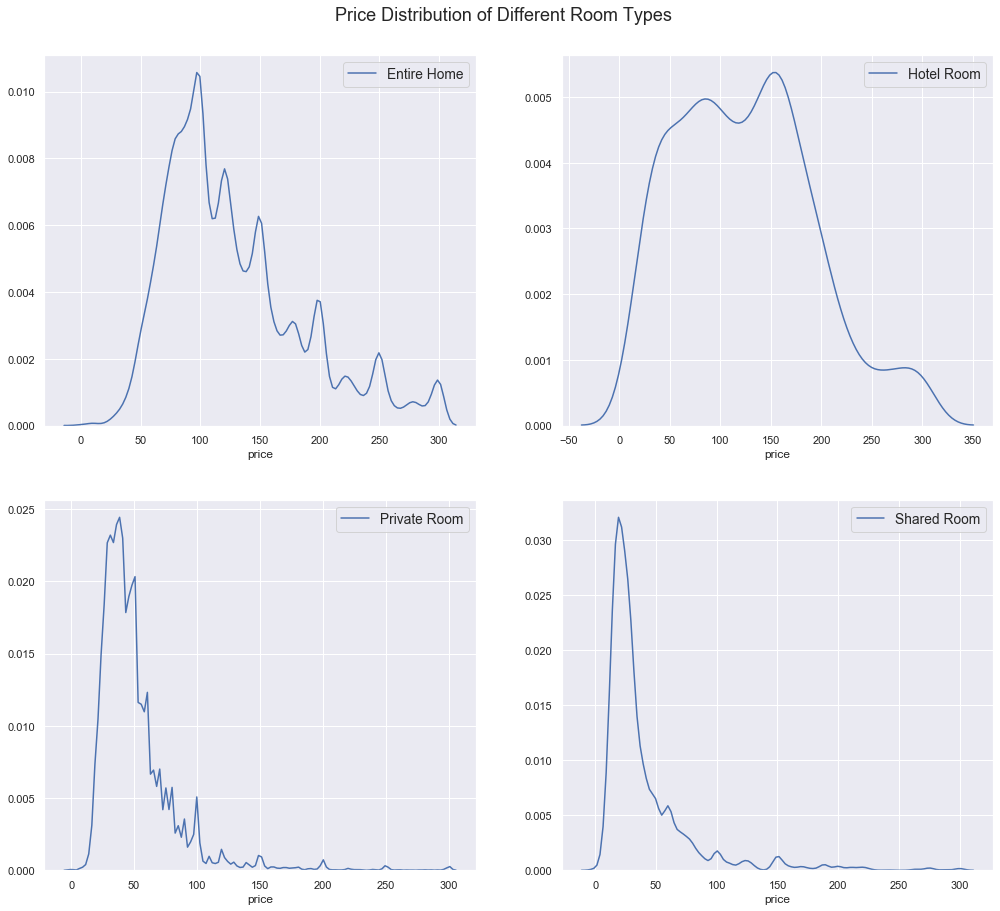

In [29]:
fig, axes = plt.subplots(nrows = 2, 
                         ncols = 2, 
                         figsize = (17,15))
sns.set(font_scale = 1.25)

for i in range(len(rooms_final)):
    sns.distplot(airbnb_df_2019[airbnb_df_2019.room_type == rooms_final[i][0]]['price'], 
                 hist = False, 
                 ax = axes.reshape(-1)[i], 
                 label = '{}'.format(rooms_final[i][1]))
    
fig.suptitle('Price Distribution of Different Room Types', y = 0.925)
plt.show()

Classic. We can clearly deduce that the above distributions are non-normal and as such violates the normality assumptions of both Z and T statistical tests. 

Nonetheless, we can fix this by relying on the Central Limit Theorem. Let's generate 10,000 mean samples for each room type with each sample having 500 observations.

In [30]:
sample_size = 500
num_simulations = 10000

CLT_dataset = []

for i in range(len(rooms_final)):
    dataset = airbnb_df_2019[airbnb_df_2019.room_type == rooms_final[i][0]].price
    CLT_dataset.append(central_limit_mean_sample(dataset, sample_size, num_simulations))

Great, now let's check if our CLT_dataset has been uploaded correctly.

In [31]:
print ('Number of datasets: {}'.format(len(CLT_dataset)))
print ('Number of simulation in each dataset: {}'.format(len(CLT_dataset[0])))

Number of datasets: 4
Number of simulation in each dataset: 10000


Cool, everything now looks in place for the subsequent visualization below.

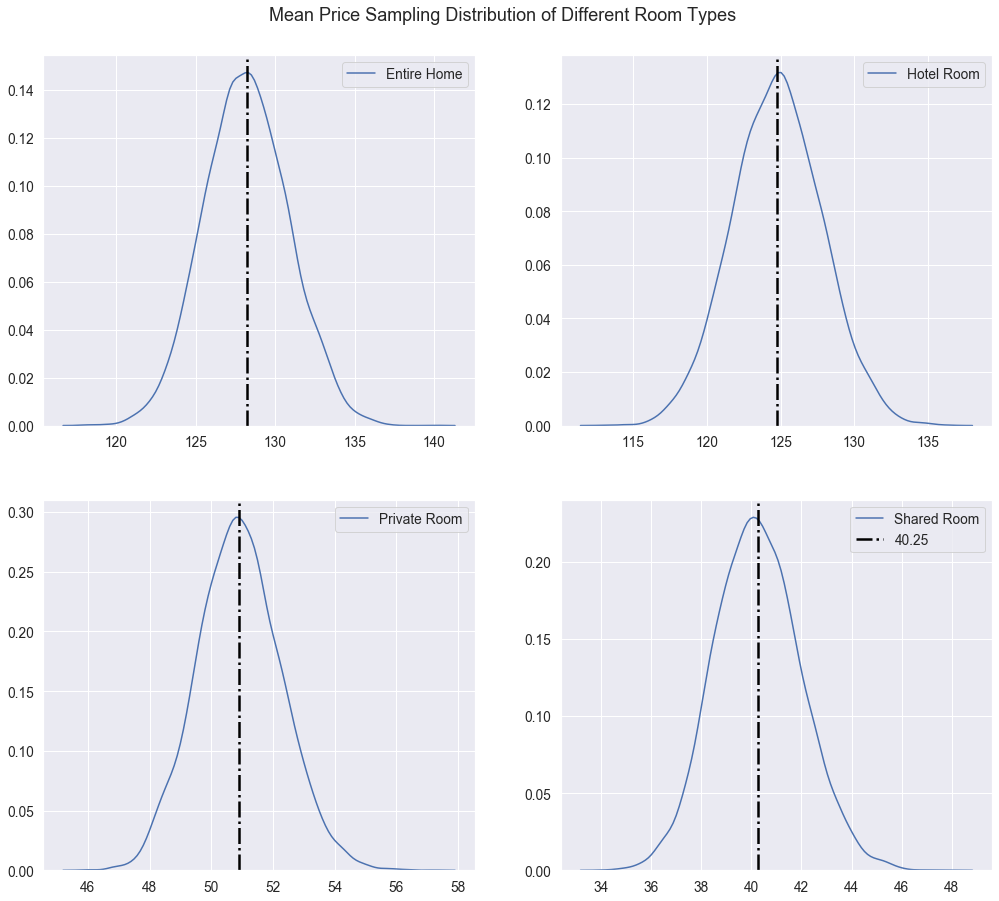

In [63]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (17,15))
sns.set(font_scale = 1.25)

for i in range(len(CLT_dataset)):
    
    sns.distplot(CLT_dataset[i], hist = False, ax = axes.reshape(-1)[i], 
                 label = '{}'.format(rooms_final[i][1]))
    
    axes.reshape(-1)[i].axvline(x = np.mean(CLT_dataset[i]), 
                                color = 'black',
                                linestyle = '-.',
                                linewidth = 2.5,
                                label = 'Mean: {}'.format(round(np.mean(CLT_dataset[i]),2)) 
)
fig.suptitle('Mean Price Sampling Distribution of Different Room Types', y = 0.925)
plt.legend()
plt.show()

Nice, our data is now normally disributed. Let's put all of them in a single graph to determine if there are any significance on a visual basis.

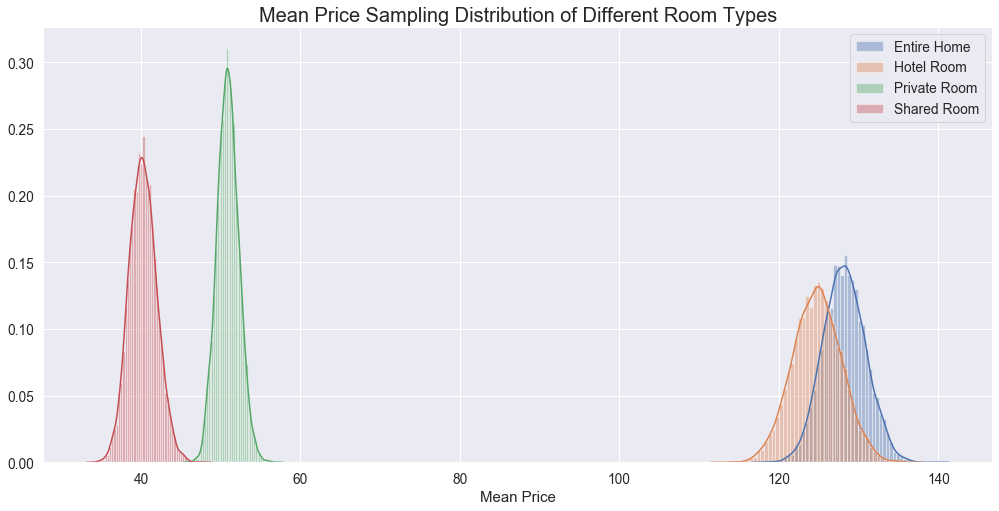

In [33]:
plt.figure(figsize=(17,8))
sns.set(font_scale = 1.25)

for i in range(len(CLT_dataset)):
    sns.distplot(CLT_dataset[i], label = rooms_final[i][1])
    
plt.title('Mean Price Sampling Distribution of Different Room Types', fontsize = 20)
plt.xlabel('Mean Price')
plt.legend()
plt.show()

Now, visually we can see some statistically differences in price between private and shared rooms. However, we can't tell if this is also the case for hotel rooms and entire homes. 

Logiscally speaking, we would expect entire homes to cost more than a single hotel room. That being said, we need to statistically test. Instead of using the usual one-tailed two sample independent t-test, it is safer to use the  Welch's t-test whenever sample sizes and variances are unequal between groups. Also the Welch's t-test gives the same result when sample sizes and variances are equal. Formulas for this is in the external module folder.

Before setting our test, we need to set the null and hypothesis statements alongside the alpha value.

*H-null: Mean price of entire homes = Mean price of hotel rooms*

*H-alt: Mean price of entire homes > Mean price of hotel rooms*

*alpha = 0.05*

In [34]:
CLT_df = []

for i in range(len(CLT_dataset)):
    df = pd.DataFrame(CLT_dataset[i])
    df['room_type'] = rooms_final[i][1]
    CLT_df.append(df)

room_df = pd.concat([x for x in CLT_df], axis = 0 )
room_df.columns = ['mean_price', 'room_type']
room_df.head()

,mean_price,room_type
0,132.594,Entire Home
1,125.882,Entire Home
2,127.784,Entire Home
3,129.696,Entire Home
4,131.386,Entire Home


Cool, let's now pass in the data as per below.

In [35]:
results_CLT = ols('mean_price ~ C(room_type)', data = room_df).fit()
aov_table_CLT = sm.stats.anova_lm(results_CLT, typ =2)
print (aov_table_CLT)

                    sum_sq       df             F  PR(>F)
C(room_type)  6.607982e+07      3.0  4.162119e+06     0.0
Residual      2.116653e+05  39996.0           NaN     NaN


In [36]:
mc_CLT = MultiComparison(room_df['mean_price'], room_df['room_type'])
mc_results_CLT = mc_CLT.tukeyhsd()
mc_results_CLT.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Entire Home,Hotel Room,-3.4125,0.001,-3.4961,-3.3289,True
Entire Home,Private Room,-77.2812,0.001,-77.3648,-77.1976,True
Entire Home,Shared Room,-87.9382,0.001,-88.0218,-87.8547,True
Hotel Room,Private Room,-73.8687,0.001,-73.9523,-73.7851,True
Hotel Room,Shared Room,-84.5257,0.001,-84.6093,-84.4422,True
Private Room,Shared Room,-10.657,0.001,-10.7406,-10.5734,True


Alright, as per above we can deduct that mean prices are statisfically significant between all pairwise groups.

In [37]:
room_dict = {'room': ['Entire Home', 'Hotel Room', 'Private Room', 'Shared Room'],
             'cleaning': [60, 25, 25 ,25],
             'price': [np.mean(i) for i in CLT_dataset]}

analysis = pd.DataFrame(room_dict)
analysis['Your_Charge'] = analysis.price * 0.125
analysis['absolute_margin'] = analysis.price - analysis.cleaning - analysis.Your_Charge
analysis['pct_margin'] = (analysis.absolute_margin/analysis.price) * 100
analysis.head()

,room,cleaning,price,Your_Charge,absolute_margin,pct_margin
0,Entire Home,60,128.191002,16.023875,52.167127,40.694843
1,Hotel Room,25,124.778509,15.597314,84.181196,67.464499
2,Private Room,25,50.909787,6.363723,19.546064,38.393529
3,Shared Room,25,40.252766,5.031596,10.221170,25.392467


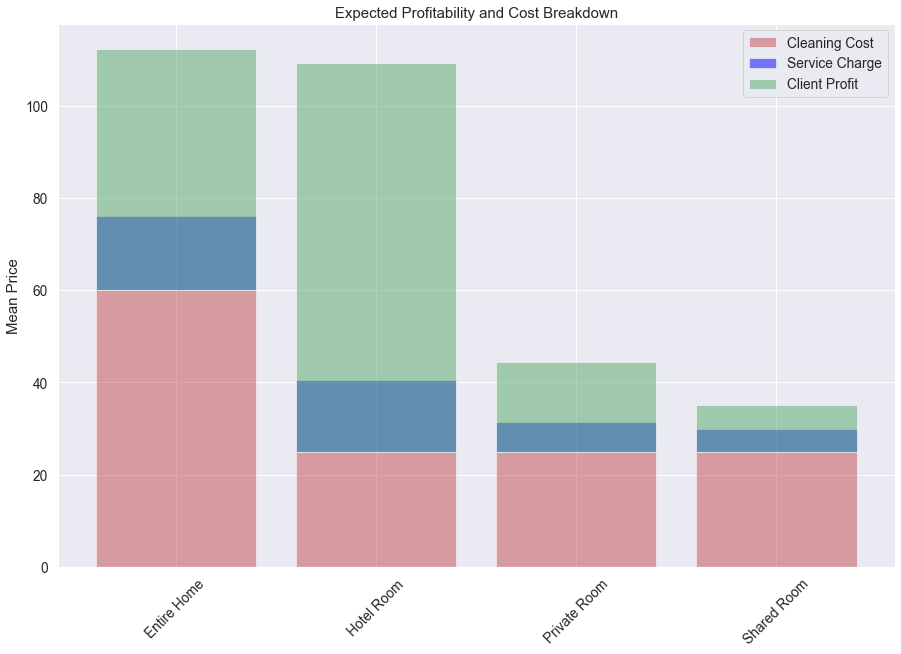

In [38]:
plt.figure(figsize = (15,10))
# plt.scatter(analysis.room, analysis.pct_margin, color = 'b', marker = 'D', s = 50)

plt.bar(analysis.room, analysis.cleaning, color = 'r', alpha = 0.5, label = 'Cleaning Cost')
plt.bar(analysis.room, analysis.Your_Charge, color = 'blue', alpha = 0.5, bottom = analysis.cleaning, label = 'Service Charge')
plt.bar(analysis.room, analysis.absolute_margin, color = 'g', alpha = 0.5, bottom = analysis.cleaning, label = 'Client Profit')

plt.xticks(analysis.room, rotation = 45)
plt.ylabel('Mean Price')
plt.title('Expected Profitability and Cost Breakdown')
plt.legend()
plt.show()

### Summary

There is statistically significant difference between prices of room type. To achieve better profitability for both host manager and final client, we suggest focusing more on entire homes, followed by private rooms. 

### Question 2: Are there significant differences between London neighbourhoods?

In [39]:
full_location = [(32, 'Westminster'), (29, 'Tower Hamlets'), (11, 'Hackney'), (19, 'Kensington and Chelsea'), 
                 (5, 'Camden'), (18, 'Islington'), (27, 'Southwark'), (21, 'Lambeth'), (31, 'Wandsworth'),
                 (12, 'Hammersmith and Fulham'), (3, 'Brent'), (22, 'Lewisham'), (13, 'Haringey'), (24, 'Newham'),
                 (8, 'Ealing'), (10, 'Greenwich'), (1, 'Barnet'), (30, 'Waltham Forest'), (23, 'Merton'),
                 (26, 'Richmond upon Thames'), (7, 'Croydon'), (17, 'Hounslow'), (25, 'Redbridge'), (4, 'Bromley'),
                 (9, 'Enfield'), (16, 'Hillingdon'), (20, 'Kingston upon Thames'), (14, 'Harrow'), (6, 'City of London'),
                 (0, 'Barking and Dagenham'), (28, 'Sutton'), (2, 'Bexley'), (15, 'Havering')]

full_location = sorted(full_location, key = lambda x: x[0])

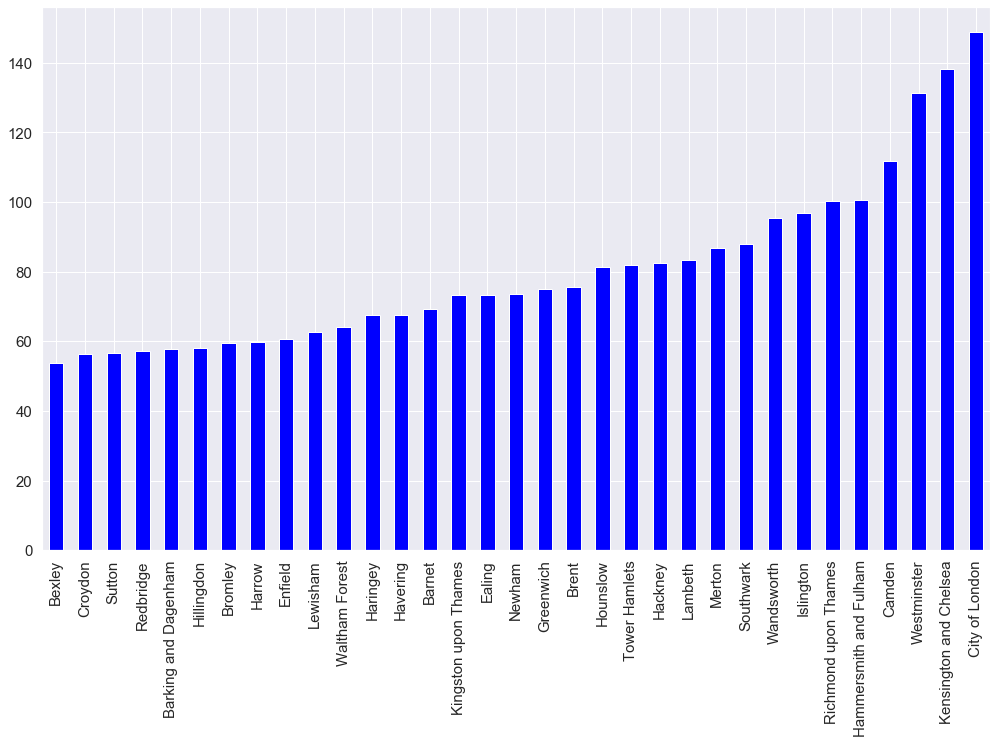

In [40]:
plt.figure(figsize = (17,10))
to_plot = airbnb_df_2019.groupby('neighbourhood')['price'].mean()
to_plot.index = [x[1] for x in full_location]
to_plot.sort_values(inplace=True)
to_plot.plot(kind='bar', colormap = 'winter', fontsize=15)
plt.show()

In [41]:
inner_london = ['Hammersmith and Fulham', 'Kensington and Chelsea', 'Westminster', 'City of London',
               'Tower Hamlets', 'Newham', 'Hackney', 'Islington', 'Camden', 'Haringey',
               'Wandsworth', 'Lambeth', 'Southwark', 'Lewisham']

full_inner_location = [x for x in full_location if x[1] in inner_london]

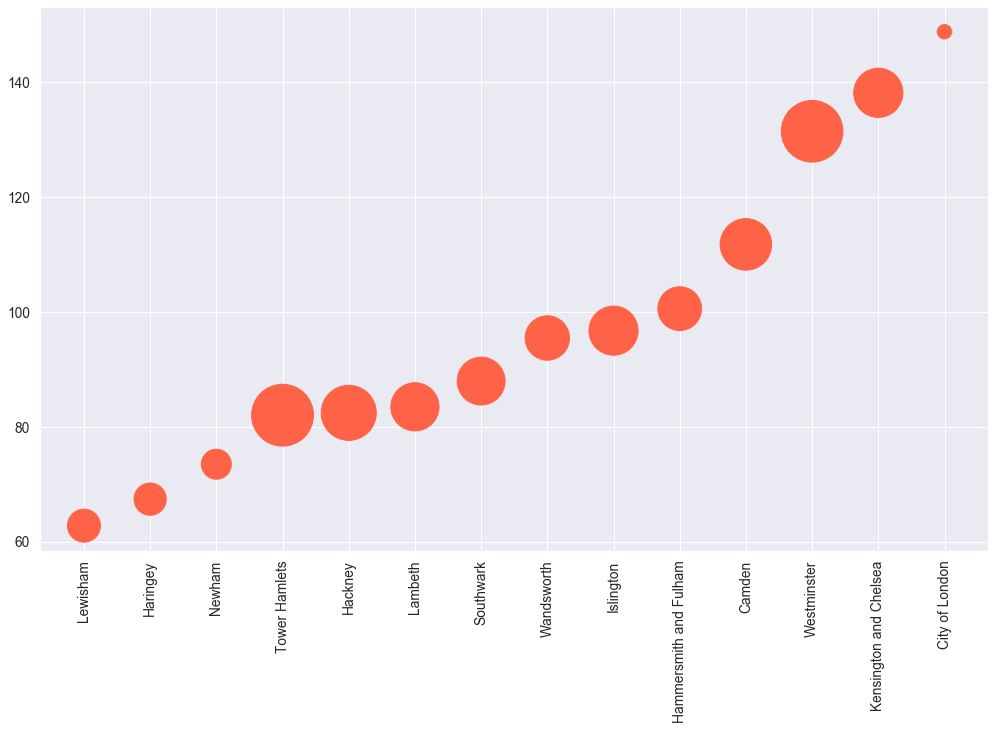

In [42]:
inner_london_dataset = airbnb_df_2019[airbnb_df_2019.neighbourhood.isin([x[0] for x in full_inner_location])]
to_plot_2 = inner_london_dataset.groupby('neighbourhood').price.agg(['mean', 'count'])
to_plot_2.index = [x[1] for x in full_inner_location]
to_plot_2.sort_values(by = 'mean', inplace = True)

plt.figure(figsize = (17,10))
plt.scatter(to_plot_2.index, to_plot_2['mean'], s = to_plot_2['count'] * 0.075, c = 'tomato')
plt.xticks(rotation = 90)
plt.show()

Let's now generate multiple samples for each to get a normally distributed data

In [43]:
inner_london_CLT = []

sample_size = 500
num_simulations = 10000 

for i in range(len(full_inner_location)):
    dataset = airbnb_df_2019[airbnb_df_2019.neighbourhood == full_inner_location[i][0]]['price']
    inner_london_CLT.append(central_limit_mean_sample(dataset, sample_size, num_simulations))

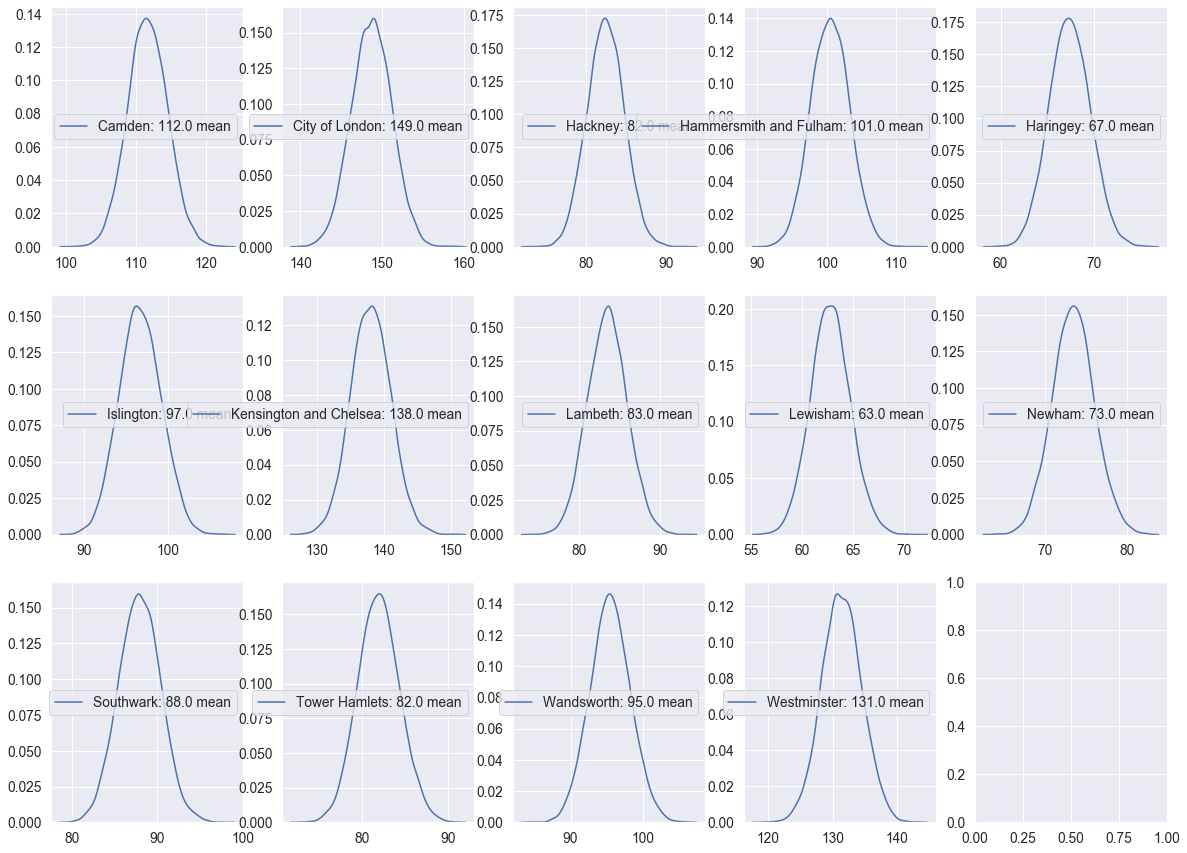

In [44]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,15))

for i in range(len(inner_london_CLT)):
    sns.distplot(inner_london_CLT[i], hist = False, ax = axes.reshape(-1)[i], 
                 label = '{}: {} mean'.format(full_inner_location[i][1], round(np.mean(inner_london_CLT[i]))))

plt.show()

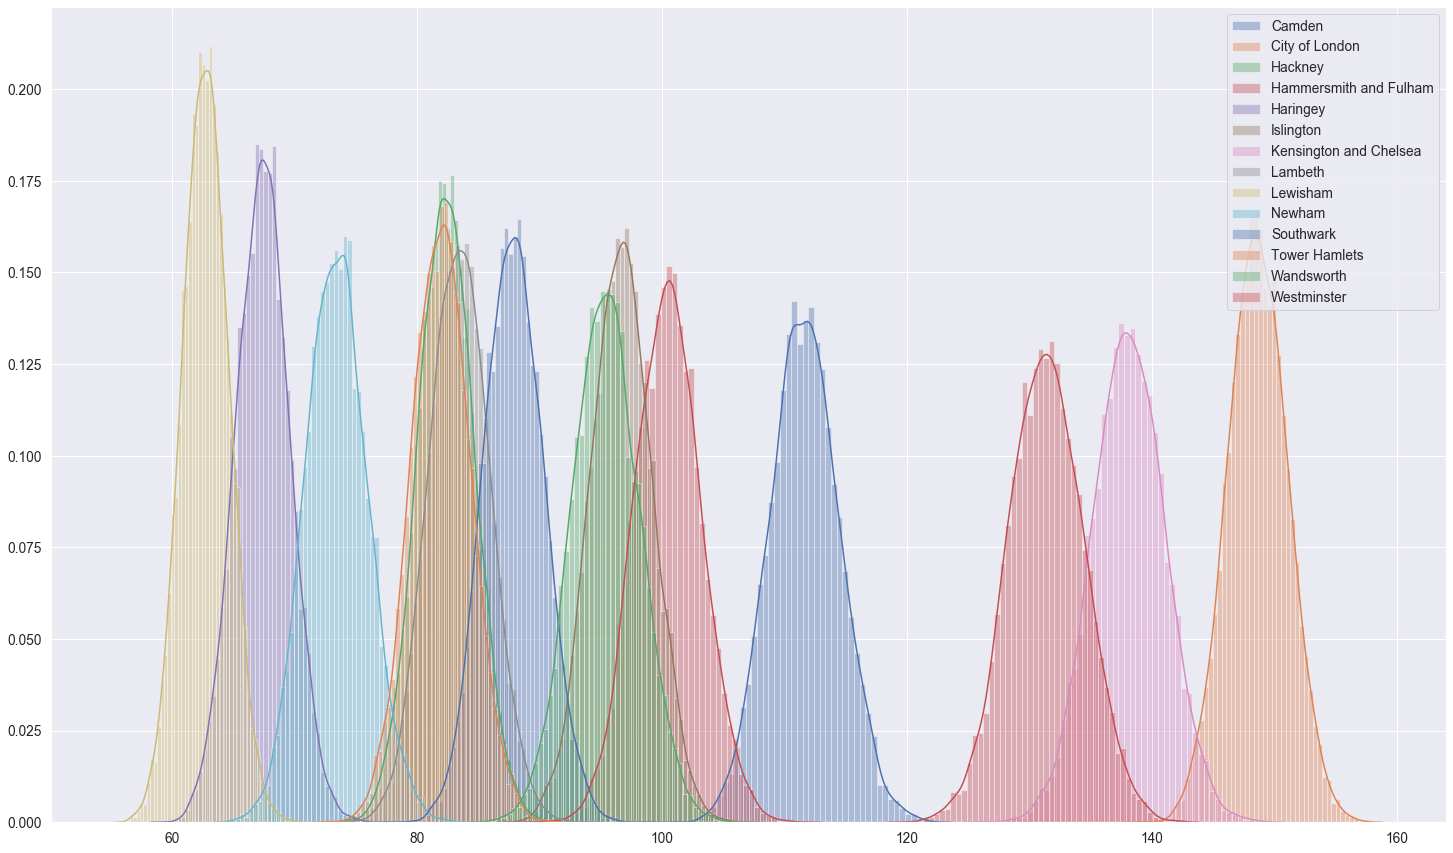

In [45]:
plt.figure(figsize = (25,15))

for i in range(len(inner_london_CLT)):
    sns.distplot(inner_london_CLT[i], label = full_inner_location[i][1])
plt.legend(loc = 'upper right')
plt.show()

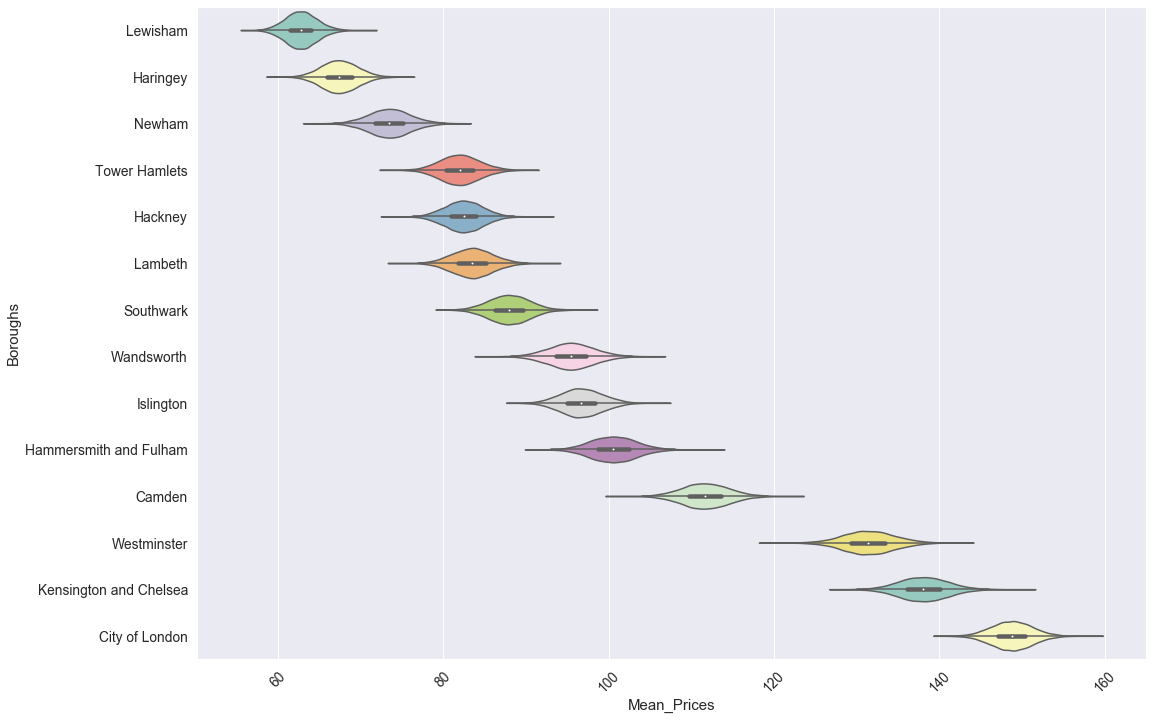

In [66]:
inner_london_list = []

for i in range(len(inner_london_CLT)):
    df = pd.DataFrame(inner_london_CLT[i])
    df['borough'] = full_inner_location[i][1]
    inner_london_list.append(df)

inner_london_df = pd.concat([x for x in inner_london_list], axis = 0 )
inner_london_df.columns = ['Mean_Prices', 'Boroughs']
order = inner_london_df.groupby('Boroughs')['Mean_Prices'].mean().sort_values().index

f, ax = plt.subplots(figsize=(17, 12))

sns.violinplot(x="Mean_Prices",y="Boroughs",data=inner_london_df, palette="Set3", order = order)
plt.xticks(rotation = 45)
plt.show()

In [72]:
power_analysis = TTestIndPower()
alpha = 0.05

Hackney_CLT = ['Hackney', inner_london_CLT[2]]
Lambeth_CLT = ['Lambeth', inner_london_CLT[7]]
Tower_CLT = ['Tower_Hamlets', inner_london_CLT[11]]
combos_CLT = itertools.combinations([Hackney_CLT,Lambeth_CLT,Tower_CLT], 2)

for combo in list(combos_CLT):
    df2 = welch_degrees_of_freedom(combo[0][1], combo[1][1])
    critical_value2 = critical_t(alpha, df2)
    welch_test2 = welch_ttest(combo[0][1], combo[1][1])
    p_value2 = p_value(combo[0][1], combo[1][1])
    effect_size2 = effect_size(combo[0][1], combo[1][1])
    power2 = power_analysis.solve_power(effect_size = effect_size2, nobs1 = sample_size, alpha = 0.05)
    print (combo[0][0]+' and '+combo[1][0])
    print ('Welch Test of: {}'.format(welch_test2))
    print ('P value of: {}'.format(p_value2))
    print ('Effect size of: {}'.format(effect_size2))
    print ('Power of: {}'.format(power2))
    print ("\n")

Hackney and Lambeth
Welch Test of: 31.170577266442724
P value of: 0.0
Effect size of: 0.4408405737517837
Power of: 1.0


Hackney and Tower_Hamlets
Welch Test of: 14.324893136042899
P value of: 0.0
Effect size of: 0.20259471151420302
Power of: 0.8925596901104649


Lambeth and Tower_Hamlets
Welch Test of: 44.28930326252091
P value of: 0.0
Effect size of: 0.6263766530347821
Power of: 1.0




In [74]:
scipy.stats.ttest_ind(Hackney_CLT[1], Lambeth_CLT[1], equal_var = False)

Ttest_indResult(statistic=-31.170577266442724, pvalue=2.6635462517798465e-208)

In [75]:
results2 = ols('Mean_Prices ~ C(Boroughs)', data = inner_london_df).fit()
aov_table2 = sm.stats.anova_lm(results2, typ =2)
print (aov_table2)

                   sum_sq        df             F  PR(>F)
C(Boroughs)  9.080356e+07      13.0  1.072734e+06     0.0
Residual     9.114908e+05  139986.0           NaN     NaN


In [76]:
mc2 = MultiComparison(inner_london_df['Mean_Prices'], inner_london_df['Boroughs'])
mc_results2 = mc2.tukeyhsd()
mc_results2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Camden,City of London,37.0714,0.001,36.9504,37.1925,True
Camden,Hackney,-29.2131,0.001,-29.3341,-29.0921,True
Camden,Hammersmith and Fulham,-11.1181,0.001,-11.2391,-10.9971,True
Camden,Haringey,-44.252,0.001,-44.373,-44.131,True
Camden,Islington,-14.968,0.001,-15.089,-14.847,True
Camden,Kensington and Chelsea,26.3953,0.001,26.2742,26.5163,True
Camden,Lambeth,-28.1702,0.001,-28.2913,-28.0492,True
Camden,Lewisham,-48.8981,0.001,-49.0192,-48.7771,True
Camden,Newham,-38.1904,0.001,-38.3114,-38.0694,True
Camden,Southwark,-23.721,0.001,-23.842,-23.6,True


In [77]:
path = 'external_modules/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(path)

In [78]:
to_join = [
'Kingston upon Thames', 
'Croydon', 
'Bromley', 
'Hounslow', 
'Ealing', 
'Havering', 
'Hillingdon', 
'Harrow', 
'Brent', 
'Barnet', 
'Lambeth', 
'Southwark', 
'Lewisham', 
'Greenwich', 
'Bexley', 
'Enfield', 
'Waltham Forest', 
'Redbridge', 
'Sutton', 
'Richmond upon Thames', 
'Merton', 
'Wandsworth', 
'Hammersmith and Fulham', 
'Kensington and Chelsea',
'Westminster', 
'Camden', 
'Tower Hamlets', 
'Islington', 
'Hackney', 
'Haringey', 
'Newham', 
'Barking and Dagenham', 
'City of London', 
]

In [79]:
map_df['borough'] = to_join
map_df['mean_price'] = map_df.borough.map(dict(to_plot))
map_df['coords'] = map_df.geometry.apply(lambda x: x.representative_point().coords[:])
map_df['coords'] = [coords[0] for coords in map_df['coords']]
map_df.head()

,geometry,borough,mean_price,coords
0,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,73.301030,"(519994.2485496496, 166150.85)"
1,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,56.416740,"(534962.0104805692, 163446.84999999998)"
2,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,59.620322,"(543635.0728800413, 165067.35)"
3,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,81.411792,"(512742.5814, 174963.45)"
4,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,73.434520,"(517056.6275229358, 181946.0)"


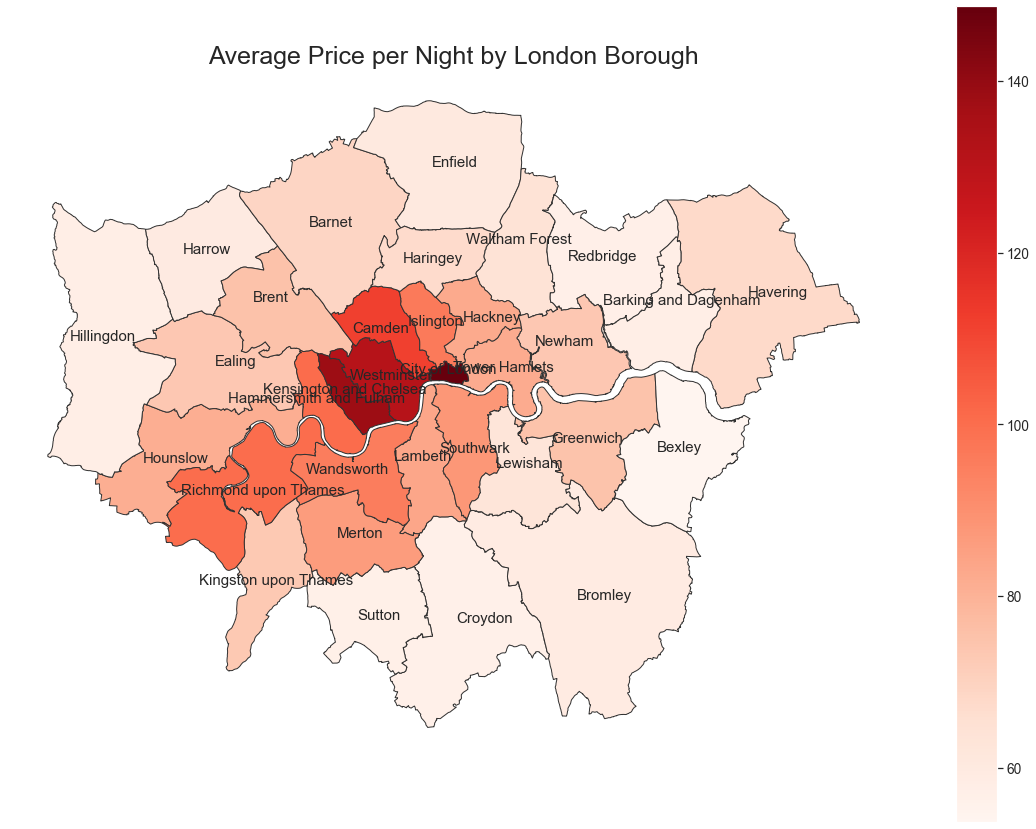

In [80]:
fig, ax = plt.subplots(1, figsize=(20, 15))

map_df.plot('mean_price', cmap = 'Reds', ax = ax, edgecolor = '0.2', legend = True)
ax.axis('off')
ax.set_title('Average Price per Night by London Borough', fontdict={'fontsize': '25'})

for idx, row in map_df.iterrows():
    ax.annotate(s = row['borough'], xy = row['coords'], ha = 'center')

plt.show()

In [81]:
inner_london_map = map_df[map_df.borough.isin(inner_london)]

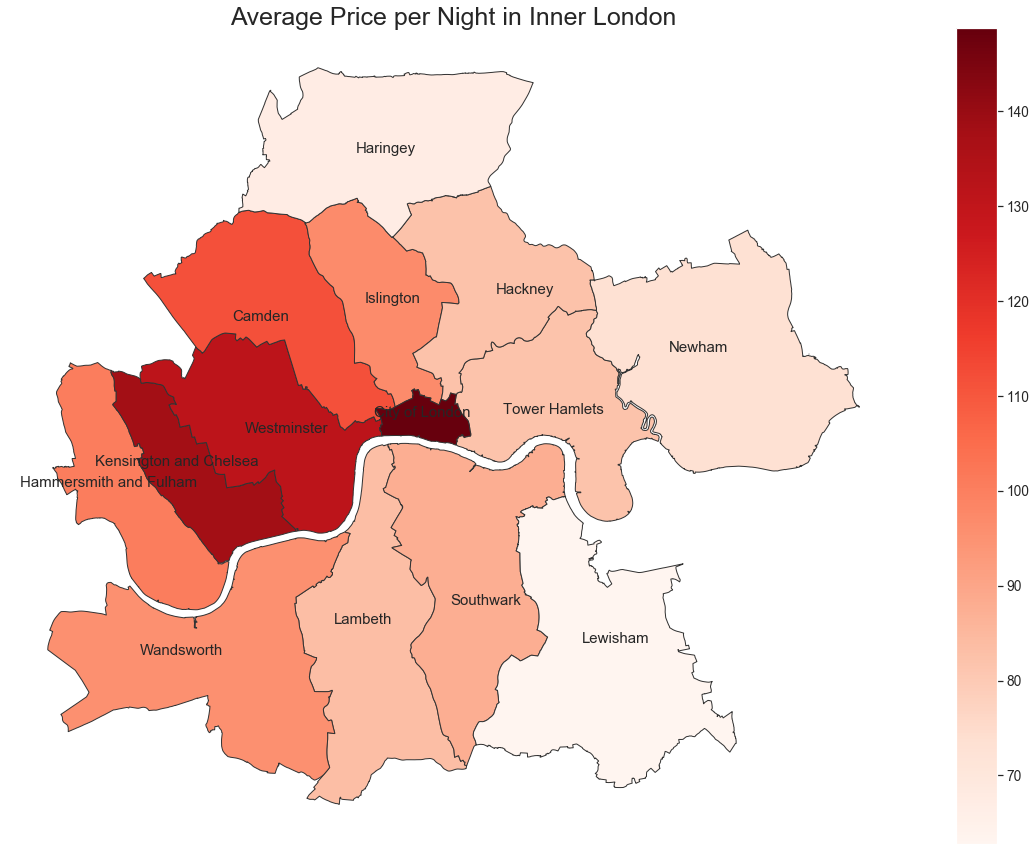

In [82]:
fig, ax = plt.subplots(1, figsize=(20, 15))

inner_london_map.plot('mean_price', cmap = 'Reds', ax = ax, edgecolor = '0.2', legend = True)
ax.axis('off')
ax.set_title('Average Price per Night in Inner London', fontdict={'fontsize': '25'})

for idx, row in inner_london_map.iterrows():
    ax.annotate(s = row['borough'], xy = row['coords'], ha = 'center')

plt.show()

### Question 3: is there a statistical significance between number of reviews and price?

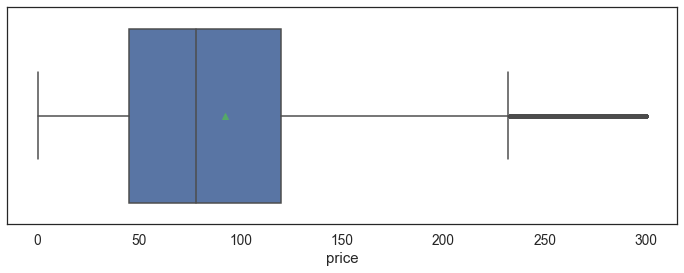

In [104]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = airbnb_df_2019, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
sns.set_style("white")
plt.show()

### Plot relationship between reviews and price

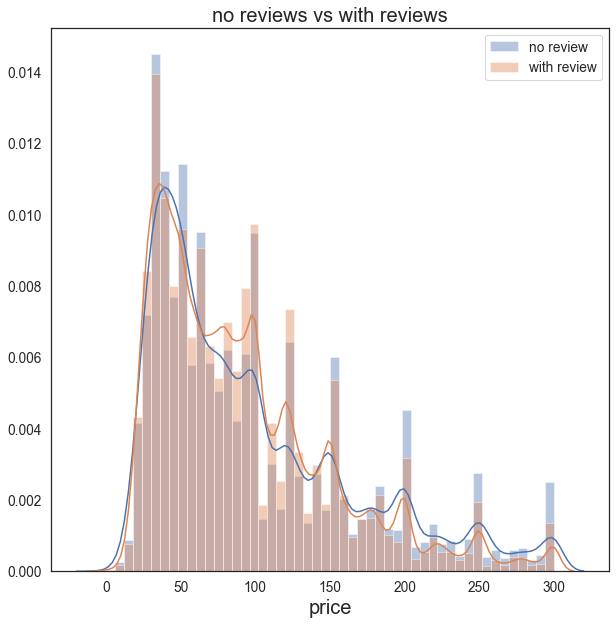

In [103]:
ctrl_q1 = airbnb_df_2019[airbnb_df_2019['number_of_reviews']==0]['price']
exper_q1 = airbnb_df_2019[airbnb_df_2019['number_of_reviews']!=0]['price']

plt.figure(figsize=(10, 10))
sns.distplot(ctrl_q1, label='no review')
sns.set_color_codes("muted")
sns.distplot(exper_q1, label='with review')
sns.set_style("white")
plt.title('no reviews vs with reviews',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.legend();

### Creat two sample T test

#### Create sampling data

In [85]:
scipy.stats.normaltest(ctrl_q1)

NormaltestResult(statistic=17881.078876086925, pvalue=0.0)

In [86]:
scipy.stats.normaltest(exper_q1)

NormaltestResult(statistic=71147.74423849846, pvalue=0.0)

Both P value equal to zero means the data is not normally distributed

In [87]:
ctrl_sample_q1 = create_sample_distribution(ctrl_q1)

In [88]:
exper_sample_q1 = create_sample_distribution(exper_q1)

#### Plot sampling data

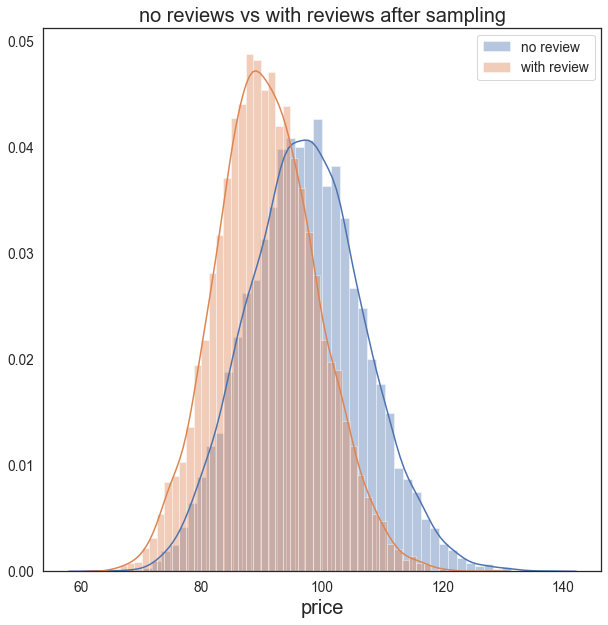

In [102]:
plt.figure(figsize=(10, 10))
sns.distplot(ctrl_sample_q1, label='no review')
sns.set_color_codes("muted")
sns.distplot(exper_sample_q1, label='with review' )
sns.set_style("white")
plt.title('no reviews vs with reviews after sampling',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.legend();

#### Cohen'd and p value

In [90]:
p = scipy.stats.ttest_ind(ctrl_sample_q1, exper_sample_q1)[1]
d = Cohen_d(np.array(ctrl_sample_q1), np.array(exper_sample_q1))

In [91]:
result_cohen_d_p(p, d)

p value is 0.0 effect size is 0.710137641963613
It has a medium effect
Reject Null Hypothesis


### Multiple comparison ANOVA

#### Check range of 'number of reviews'

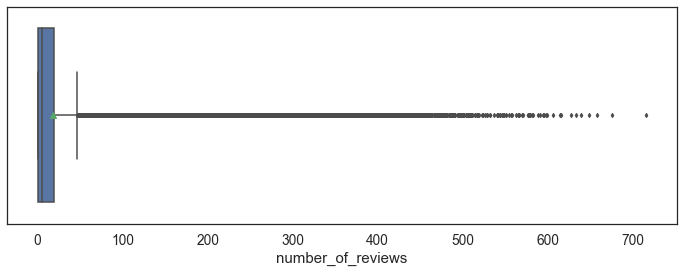

In [101]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'number_of_reviews', 
            data = airbnb_df_2019, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
sns.set_style("white")
plt.show()

#### Create bins with range of 100 reviews

we are going to gather the number of reviews with bin of 100 from 0 - 700

In [93]:
df_binned = []
df_binned.append(airbnb_df_2019[airbnb_df_2019['number_of_reviews']==0])
for number in [0, 100,200,300,400,500,600]:
    df_binned.append(airbnb_df_2019[(airbnb_df_2019['number_of_reviews']<= (number+100))&
                      (airbnb_df_2019['number_of_reviews']>number)])

In [94]:
for n,df in enumerate(df_binned):
    print(n,scipy.stats.normaltest(df['price']))

0 NormaltestResult(statistic=17881.078876086925, pvalue=0.0)
1 NormaltestResult(statistic=64820.23573177751, pvalue=0.0)
2 NormaltestResult(statistic=5308.0394530742815, pvalue=0.0)
3 NormaltestResult(statistic=1021.6246328725945, pvalue=1.4355875506593884e-222)
4 NormaltestResult(statistic=165.09825491788126, pvalue=1.4104882045809997e-36)
5 NormaltestResult(statistic=63.71383968586489, pvalue=1.4612196431096814e-14)
6 NormaltestResult(statistic=3.736783720323903, pvalue=0.15437171361321392)
7 NormaltestResult(statistic=1.7236107320707614, pvalue=0.4223988090679863)


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [155]:
df_sample=[]
for n, df in enumerate(df_binned):
    df_new = create_sample_distribution(df['price'])
    df_sample.append([n,df_new])

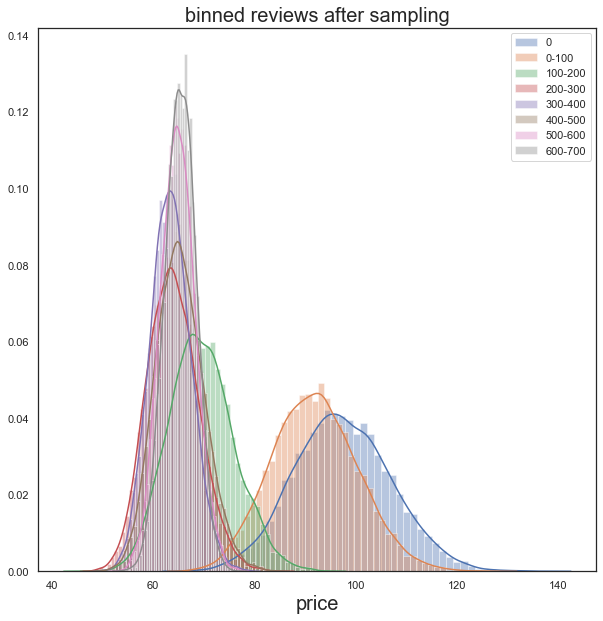

In [156]:
plt.figure(figsize=(10, 10))
sns.distplot(df_sample[0][1], label=0)
for n,df in enumerate(df_sample[1:]):
    sns.distplot(df[1], label=str(n*100)+'-'+str(n*100+100))
    sns.set_style("white")
plt.title('binned reviews after sampling',fontsize=20)
plt.xlabel('price',fontsize=20)
plt.legend();

In [138]:
# df_1 =[]
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# for n,df in enumerate(df_sample):
#     df_1.append(df[1])
#     # Draw the densities in a few steps
#     g = sns.FacetGrid(df[1], aspect=15, height=.5, palette=pal)
#     print(df[1])
#     g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
#     g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
#     g.map(plt.axhline, y=0, lw=2, clip_on=False)


#         # Define and use a simple function to label the plot in axes coordinates
#     def label(x, color, label):
#         ax = plt.gca()
#         ax.text(0, .2, label, fontweight="bold", color=color,
#                 ha="left", va="center", transform=ax.transAxes)


#     g.map(label, "x")

#         # Set the subplots to overlap
#     g.fig.subplots_adjust(hspace=-.25)

#         # Remove axes details that don't play well with overlap
#     g.set_titles("")
#     g.set(yticks=[])
#     g.despine(bottom=True, left=True)
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data

df_sample
# # Initialize the FacetGrid object
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(df, row="1", hue="1", aspect=15, height=.5, palette=pal)
# print(g)
# # Draw the densities in a few steps
# g.map(sns.kdeplot, "0", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
# g.map(sns.kdeplot, "0", clip_on=False, color="w", lw=2, bw=.2)
# g.map(plt.axhline, y=0, lw=2, clip_on=False)



# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.25)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

[[0,
  [90.9,
   95.36,
   99.64,
   101.04,
   95.46,
   96.78,
   91.12,
   98.44,
   88.26,
   89.28,
   104.86,
   119.68,
   96.7,
   93.86,
   92.36,
   90.34,
   104.5,
   82.76,
   88.74,
   107.74,
   86.06,
   104.36,
   110.58,
   93.14,
   94.28,
   98.68,
   94.22,
   106.06,
   92.8,
   100.86,
   89.22,
   99.56,
   107.3,
   83.72,
   82.6,
   81.4,
   98.14,
   112.44,
   102.92,
   111.34,
   92.54,
   107.72,
   96.88,
   104.32,
   91.6,
   109.72,
   104.42,
   80.94,
   90.88,
   91.48,
   112.58,
   100.82,
   98.02,
   89.7,
   112.38,
   97.5,
   91.82,
   83.64,
   115.18,
   103.66,
   97.28,
   93.64,
   102.32,
   100.76,
   93.08,
   107.38,
   100.86,
   86.78,
   90.26,
   109.06,
   81.3,
   114.04,
   95.02,
   98.68,
   98.66,
   98.44,
   96.14,
   100.3,
   105.96,
   96.3,
   87.66,
   105.48,
   112.7,
   81.9,
   110.0,
   97.32,
   106.14,
   100.02,
   91.68,
   97.08,
   100.5,
   90.44,
   92.84,
   95.4,
   95.8,
   93.42,
   104.88,
   97.5

In [97]:
results_p_d(df_sample)

,group,p,cohen'd,hypothesis state
0,"0,100-200",0.000000e+00,0.582162,Reject Null Hypothesis
1,"0,200-300",0.000000e+00,3.445330,Reject Null Hypothesis
2,"0,300-400",0.000000e+00,4.406395,Reject Null Hypothesis
3,"0,400-500",0.000000e+00,4.657675,Reject Null Hypothesis
4,"0,500-600",0.000000e+00,4.315379,Reject Null Hypothesis
5,"0,600-700",0.000000e+00,4.570691,Reject Null Hypothesis
6,"0,700-800",0.000000e+00,4.539378,Reject Null Hypothesis
7,"0-100,100-200",0.000000e+00,3.009617,Reject Null Hypothesis
8,"0-100,200-300",0.000000e+00,4.039936,Reject Null Hypothesis
9,"0-100,300-400",0.000000e+00,4.315541,Reject Null Hypothesis


### Summary

From the above multiple comparison anova test we can see that the price difference between each review groups are different. In general, the listings with higher prices has less reviews, while listings with lower prices with more reviews. It indicates that the cheaper homes/rooms are more popular in the market.

We suggest the new hosts can make a pricing strategy that to give more price incentives like discount in short term in order to attract more reviews; and gradually increase the price back to market level in long term when it hits stable amount of reviews.

### Question 4: is there a statistical significance between length of titles and number of reviews? if so at which levels

In [73]:
airbnb_df_2019['name_len'].unique()

array([ 6,  7,  5,  9,  4,  3,  8, 10,  2,  1, 11, 12, 42, 20, 15, 13, 27,
       17, 14, 19, 18, 21, 26, 29, 45, 16, 31, 30, 38, 23, 48])

In [74]:
np.median(airbnb_df_2019['name_len'].unique())

16.0

We will create two groups: one has length below 16 letters, the other has length equal or above 16 letters

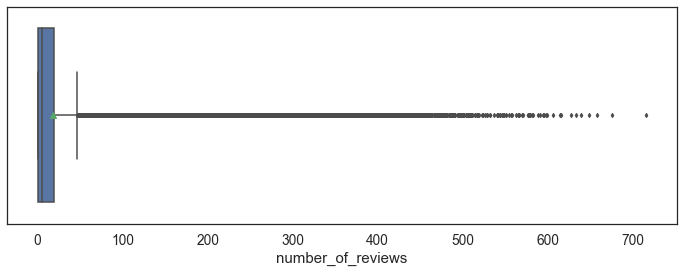

In [105]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'number_of_reviews', 
            data = airbnb_df_2019, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
sns.set_style("white")
plt.show()

In [76]:
check_quantile(airbnb_df_2019['number_of_reviews'])

0.9 quantile: 49.0
0.91 quantile: 53.0
0.92 quantile: 58.0
0.93 quantile: 65.0
0.94 quantile: 73.0
0.95 quantile: 83.0
0.96 quantile: 96.0
0.97 quantile: 114.0
0.98 quantile: 139.0
0.99 quantile: 186.0
1.0 quantile: 716.0


In [77]:
outliers = airbnb_df_2019[(airbnb_df_2019['number_of_reviews'] >84)].index
airbnb_df_2019.drop(outliers, inplace=True)

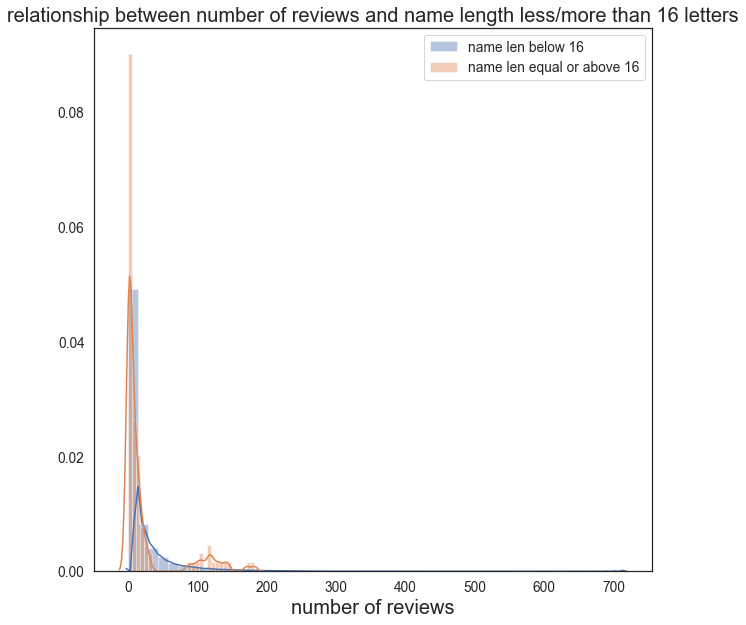

In [106]:
ctrl_q2 = airbnb_df_2019[airbnb_df_2019['name_len']<16]['number_of_reviews']
exper_q2 = airbnb_df_2019[airbnb_df_2019['name_len']>=16]['number_of_reviews']

plt.figure(figsize=(10, 10))
sns.distplot(ctrl_q2, label='name len below 16')
sns.set_color_codes("muted")
sns.distplot(exper_q2, label='name len equal or above 16' )
sns.set_style("white")
plt.title('relationship between number of reviews and name length less/more than 16 letters',fontsize=20)
plt.xlabel('number of reviews',fontsize=20)
plt.legend();

### Creat two sample T test

#### Create sampling data

In [107]:
scipy.stats.normaltest(ctrl_q2)

NormaltestResult(statistic=499379.0963920646, pvalue=0.0)

In [108]:
scipy.stats.normaltest(exper_q2)

NormaltestResult(statistic=64.11219017433888, pvalue=1.1973325586294106e-14)

In [110]:
ctrl_sample_q2 = create_sample_distribution(ctrl_q2)

In [111]:
exper_sample_q2 = create_sample_distribution(exper_q2)

#### Plot sampling data

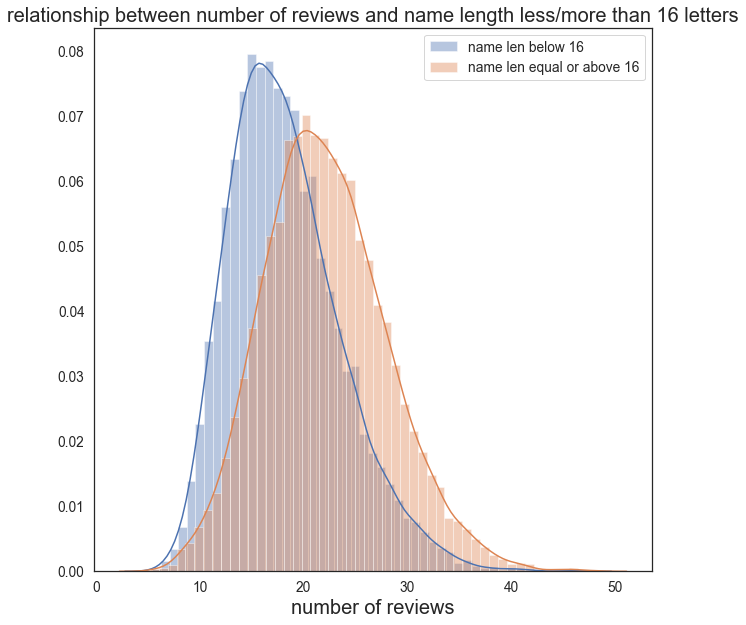

In [112]:
plt.figure(figsize=(10, 10))
sns.distplot(ctrl_sample_q2, label='name len below 16')
sns.set_color_codes("muted")
sns.distplot(exper_sample_q2, label='name len equal or above 16' )
sns.set_style("white")
plt.title('relationship between number of reviews and name length less/more than 16 letters',fontsize=20)
plt.xlabel('number of reviews',fontsize=20)
plt.legend();

#### Cohen'd and p value

In [113]:
p = scipy.stats.ttest_ind(ctrl_sample_q2, exper_sample_q2)[1]
d = Cohen_d(np.array(ctrl_sample_q2), np.array(exper_sample_q2))

In [114]:
result_cohen_d_p(p, d)

p value is 0.0 effect size is 0.6848003532660785
It has a medium effect
Reject Null Hypothesis


### Summary

The length of name has significance with number of reviews (length with less/more than 16 characters). From the chart above, name with length of less than 16 characters has higher mean value of review numbers. Therefore, we suggest host to post title with less characters.